## Complex Filtering with FFmpeg

### Introduction to FFmpeg's Filter System
FFmpeg's versatility and power largely stem from its comprehensive filter system, allowing for complex video and audio processing. The typed-ffmpeg library maintains this capability, providing a user-friendly interface for applying various filters.

### Applying Basic Filters
Below is an example of how to trim a video and add a text watermark using FFmpeg's filter functions:


Exception reporting mode: Minimal


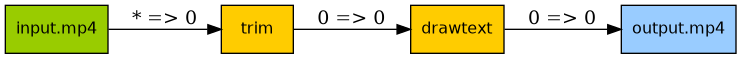

In [1]:
%xmode Minimal
import ffmpeg

# Initialize the input stream from a video file
input_stream = ffmpeg.input("input.mp4")

# Apply trimming and drawtext filters, then output to a new file
(
    input_stream.trim(start=10, end=20)
    .drawtext(text="Hello World", fontsize=12, x=10, y=10)
    .output(filename="output.mp4")
)

This operation is visualized in the accompanying diagram, illustrating the workflow of trimming a video and adding a watermark.


### Applying Source Filters
FFMpeg's source filters are also support


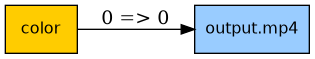

In [5]:
import ffmpeg

# Apply trimming and drawtext filters, then output to a new file
(ffmpeg.sources.color(color="red").output(filename="output.mp4"))

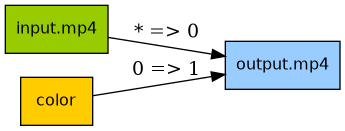

In [6]:
import ffmpeg

# Initialize the input stream from a video file
input_stream = ffmpeg.input("input.mp4")

ffmpeg.output(
    input_stream,
    ffmpeg.sources.color(color="red", size="hd1080"),
    filename="output.mp4",
)

### Handling Stream Types with FFmpeg

#### Understanding Typed Filters in FFmpeg
FFmpeg classifies its filters based on the type of media stream they process: some are intended for video streams, while others are for audio streams. This type-specific approach ensures that each filter operates on the appropriate kind of data. The typed-ffmpeg library enforces this classification through both static type checking (compatible with tools like mypy) and runtime validation, minimizing errors and streamlining filter application.

#### Example: Applying Filters Correctly by Stream Type

Consider the following code where we initialize an input stream and apply different filters:



In [7]:
import ffmpeg

# Initialize an input stream from a video file
input1 = ffmpeg.input(
    "input1.mp4"
)  # The input stream here is an AVStream, capable of handling both audio and video operations.

# Apply a reverse filter, which is specifically a video filter, to the stream
video = (
    input1.reverse()
)  # The 'reverse' filter is applied, resulting in a VideoStream output.

# Attempting to apply an audio filter (amix) to a video stream results in an error
ffmpeg.filters.amix(
    video
)  # This line will raise an exception because 'amix' is an audio filter, incompatible with a VideoStream.

FFMpegTypeError: Expected input 0 to have audio component, got VideoStream


In this example, the `reverse` filter, which is designed for video streams, successfully transforms the input into a reversed video stream. However, when attempting to apply the `amix` filter, which is intended for audio streams, to the reversed video stream, the code will raise an exception. This error occurs because typed-ffmpeg recognizes the mismatch between the stream type (video) and the expected input type for the `amix` filter (audio).

By incorporating these type checks, typed-ffmpeg aids in preventing common mistakes, such as applying an audio filter to a video stream or vice versa, thereby ensuring that filters are applied correctly and efficiently.

### Working with Multiple Inputs
Certain filters accept multiple inputs. When using such filters with typed-ffmpeg, ensure that the exact number of required streams is passed, as validated by static type checking:


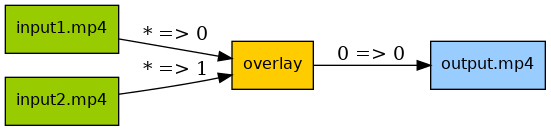

In [ ]:
import ffmpeg

# Initialize two input streams
input1 = ffmpeg.input("input1.mp4")
input2 = ffmpeg.input("input2.mp4")

# Overlay one stream over the other and output to a new file
(input1.overlay(input2, x=10, y=10).output(filename="output.mp4"))

The process of overlaying two video streams is illustrated in the diagram:



### Handling Multiple Outputs
Some filters, when applied, generate multiple output streams. typed-ffmpeg facilitates handling these scenarios with clear and concise code:

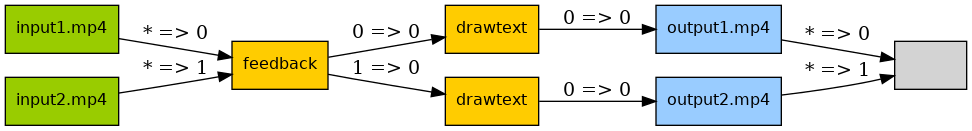

In [ ]:
import ffmpeg

# Initialize input streams
input1 = ffmpeg.input("input1.mp4")
input2 = ffmpeg.input("input2.mp4")

# Apply a filter that generates multiple outputs
video, feedout = input1.feedback(input2)  # Generates two output streams

# Process and output each stream separately
o1 = video.drawtext(text="Hello World", fontsize=12, x=10, y=10).output(
    filename="output1.mp4"
)
o2 = feedout.drawtext(text="Hello World", fontsize=12, x=10, y=10).output(
    filename="output2.mp4"
)

# Merge the outputs
ffmpeg.merge_outputs(o1, o2)

The generation of multiple output streams from a single filter application is depicted:


### Dynamic Input Filters
Some filters accept a variable number of inputs. In these cases, typed-ffmpeg offers flexibility but requires careful input management:

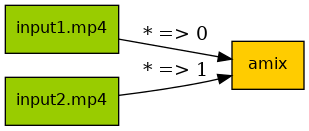

In [ ]:
import ffmpeg

# Correct usage with the expected number of inputs
input1 = ffmpeg.input("input1.mp4")
input2 = ffmpeg.input("input2.mp4")
ffmpeg.filters.amix(input1, input2, inputs=2)

Incorrect input numbers will trigger exceptions, providing immediate feedback without needing to execute FFmpeg:


In [ ]:
import ffmpeg

# Incorrect usage leading to a ValueError
input1 = ffmpeg.input("input1.mp4")
input2 = ffmpeg.input("input2.mp4")
f = ffmpeg.filters.amix(input1, input2, inputs=3)  # This will raise a ValueError

FFMpegValueError: Expected 3 inputs, got 2

Fortunately, typed-ffmpeg offers automatic detection for input variables in many of ffmpeg's dynamic input filters.

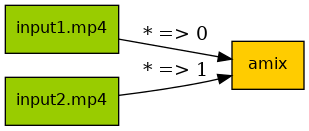

In [ ]:
import ffmpeg

input1 = ffmpeg.input("input1.mp4")
input2 = ffmpeg.input("input2.mp4")

ffmpeg.filters.amix(
    input1, input2
)  # typed-ffmpeg will auto detect the correct inputs value


### Dynamic Output Filters
Similarly, some filters yield a dynamic number of outputs. typed-ffmpeg ensures that any mismatches are quickly identified:


In [ ]:
import ffmpeg

# Initialize input and apply a split filter
input1 = ffmpeg.input("input1.mp4")
split = input1.split(outputs=2)

# Correctly accessing the outputs
video0 = split.video(0)
video1 = split.video(1)

# Incorrectly accessing an out-of-range output will raise an error
video2 = split.video(2)  # This will raise a ValueError

FFMpegValueError: Specified index 2 is out of range for video outputs 2